# rgb image

In [5]:
# configures the jupyter note book to reload python modules that are imported 
%load_ext autoreload
%autoreload 2
#configures jupyter to format matplotlib
%matplotlib inline

In [6]:
#manages conventional images 
from PIL import Image
import imageio
#manages data structures
import numpy as np

In [7]:
rgb_path = r"../npFiles/cropped_band432.npy"
cropped_band432 = np.load(rgb_path)
cropped_bands_432_img = Image.fromarray(np.uint8(cropped_band432*255))

## cloud gen

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from src import *


plt.rcParams["figure.figsize"] = (20,10)
GPU_IDX = 0

def show(tensor,*args,**kwargs):   
    while len(tensor.shape)>3:
        tensor=tensor[0]
    plt.imshow(tensor.permute(1,2,0).detach().cpu(),*args,**kwargs)

# Multi-Spectral Data
While the magnitude of the clouds is quite comparable in the RGB bands (since they appear in approximately white colour), the relationship between the cloud strength and channel frequency is generally more complex.

As an example, let's open an example file containing 12 bands from Sentinel-2 L1C (except for Band 10, which often interacts with the clouds quite differently).

In [9]:
#original hyperspectral image with original size
bands_path = r"../npFiles/bands.npy"
bands = np.load(bands_path)
bands = np.swapaxes(bands,2,0)

In [10]:
#cropped hyperspectral image with cropped size
cropped_bands_path = r"../npFiles/cropped_bands.npy"
cropped_bands = np.load(cropped_bands_path)
cropped_bands = np.swapaxes(cropped_bands,2,0)

In [20]:
# # considering using the zoom function to keep overall image but reduce resolution

# from scipy.ndimage import zoom
# factor = 0.5  # Adjust the downsampling factor as needed
# downsized_bands = zoom(bands, (1, factor, factor))


In [11]:
clean = torch.from_numpy(cropped_bands)
cloudy = torch.from_numpy(cropped_bands)
mask = torch.from_numpy(cropped_bands)

### display plot funciton

In [19]:
def hyperplot(dataset):   
    # Create a figure and set its size
    fig = plt.figure(figsize=(10, 5))


    for idx,img in enumerate(dataset[0]):
        plt.subplot(2,4,idx+1)
        plt.imshow(img, cmap='viridis')
        plt.axis('off')
        # Add labels
        if idx < 7:
            plt.text(0.5, -0.1, f"Channel {idx+1}", ha='center', transform=plt.gca().transAxes)
        else:
            plt.text(0.5, -0.1, f"Channel {idx+2}", ha='center', transform=plt.gca().transAxes)


        """This function returns the name of a variable as a string."""
    for name, value in globals().items():
        if value is dataset:
            # Add a general title above the subplots
            plt.suptitle(f"{name}", fontsize=16)


    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    # Show the plot
    plt.show()

### Standard preprocessed Hyperspectral data set from landsat 9 (Control)
frequency channels 1,2,3,4,5,6,7,9

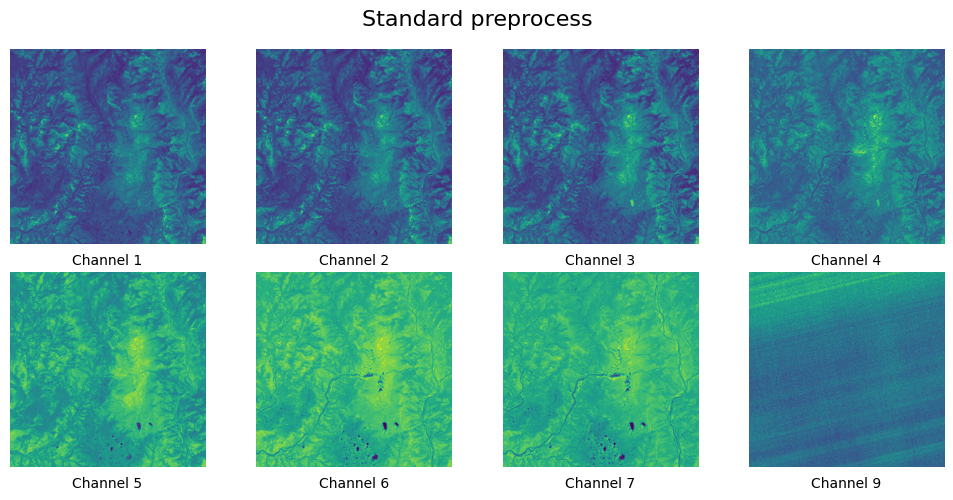

In [31]:
# Create a figure and set its size
fig = plt.figure(figsize=(10, 5))


for i in range(0,8):
    img = clean[i]
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.axis('off')
    # Add labels
    if i < 7:
        plt.text(0.5, -0.1, f"Channel {i+1}", ha='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, -0.1, f"Channel {i+2}", ha='center', transform=plt.gca().transAxes)

# Add a general title above the subplots
plt.suptitle("Standard preprocess", fontsize=16)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
from src.band_magnitudes import *

In [28]:
cmags=q_mag(cloudy,mask==0.0,mask_cloudy=mask==1.0,clean=clean,q=0.99,q2=0.5)

### max_lvl and min_lvl

In [26]:
low_minlvl_high_maxlvl=add_cloud(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.8
            )

avg_minlvl_avg_maxlvl=add_cloud(clean,
              locality_degree=2,
              min_lvl=0.3,
              max_lvl= 0.4
            )

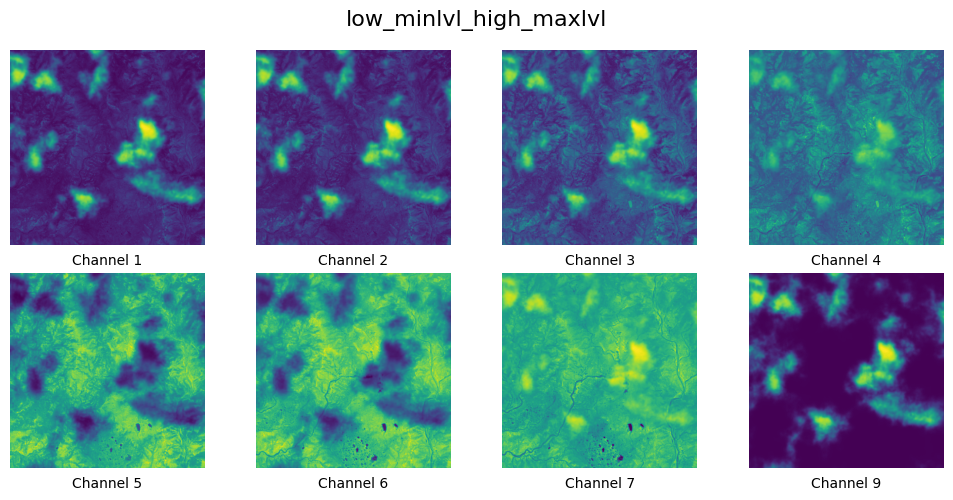

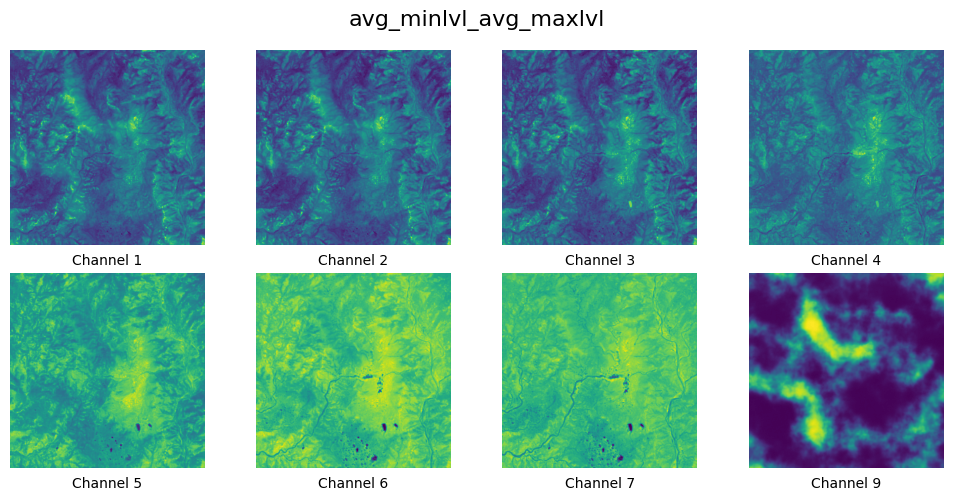

In [27]:
hyperplot(low_minlvl_high_maxlvl)
hyperplot(avg_minlvl_avg_maxlvl)

## channel magnitude 

In [2]:
# varying_channel_mag=add_cloud(clean,
#               locality_degree=2,
#               min_lvl=0.2,
#               max_lvl= 0.6,
#               channel_magnitude=np.array([1,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],1,1])
#             )

## clear_threshold

In [13]:
clear_threshold=add_cloud(clean,
              locality_degree=2,
              min_lvl=0.2,
              max_lvl= 0.6,
              clear_threshold=0.2
            )

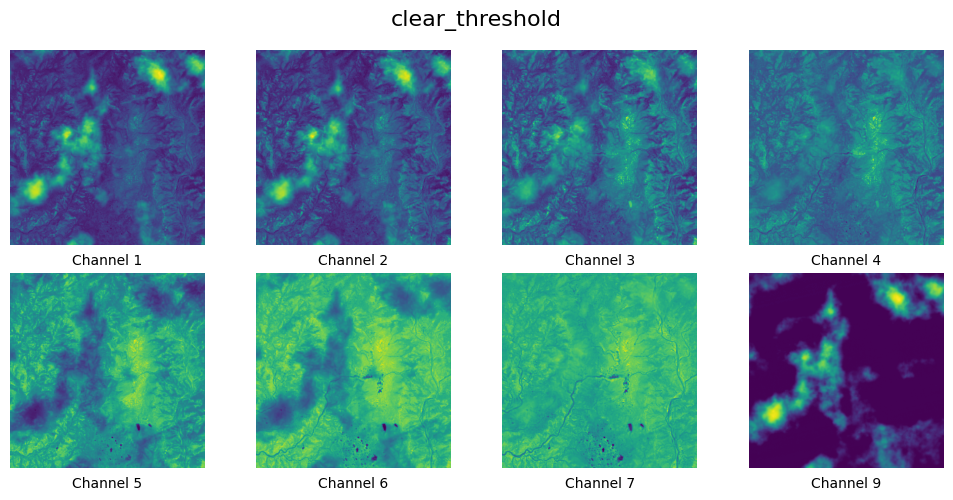

In [20]:
hyperplot(clear_threshold)

### manipulating channel offset


In [22]:
channel_offset_20 =add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.4,
              channel_offset=20
            )

channel_offset_40 =add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.4,
              channel_offset=40
            )

channel_offset_60 =add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.0,
              max_lvl= 0.4,
              channel_offset=60
            )

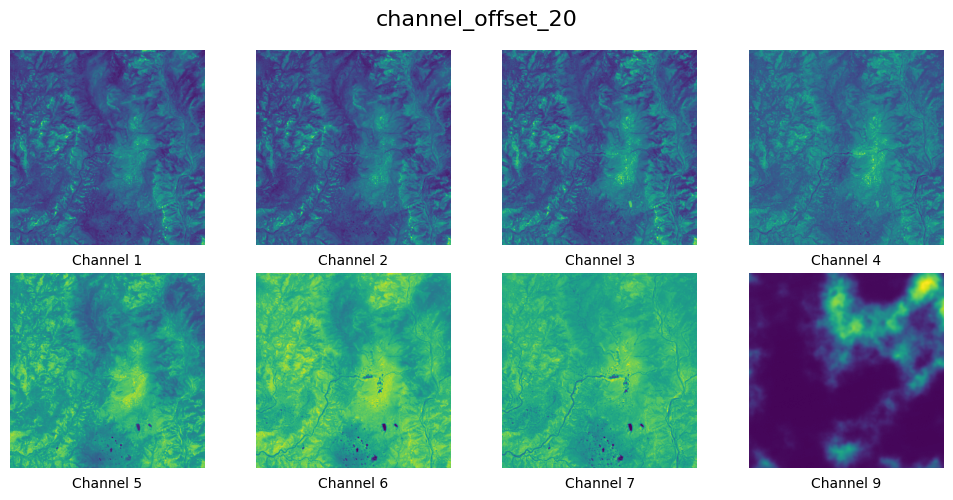

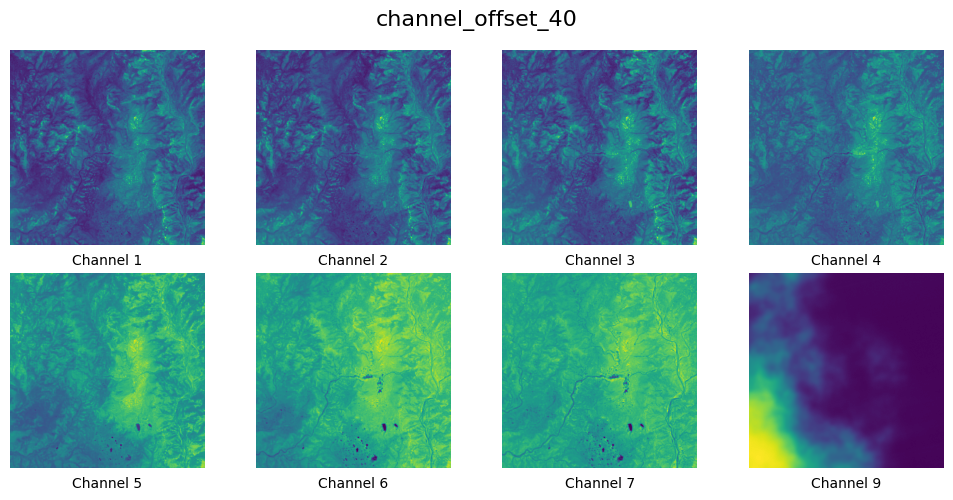

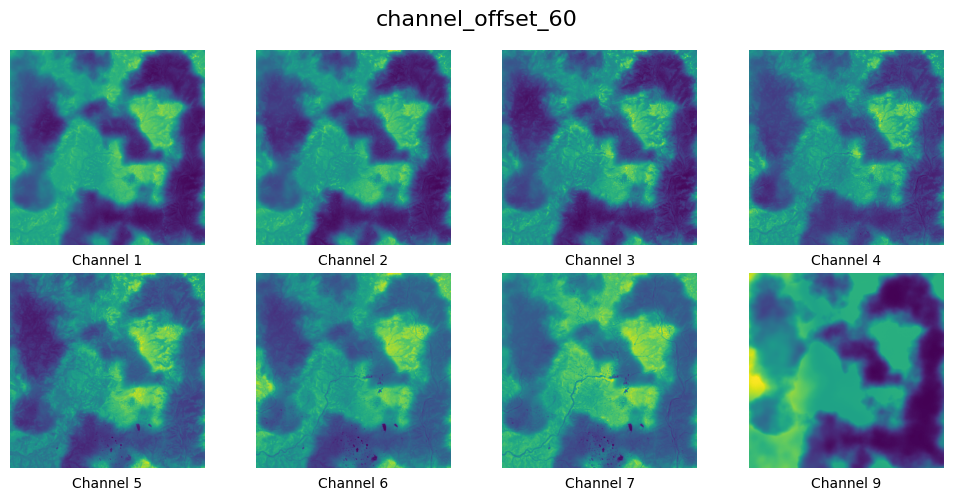

In [23]:
hyperplot(channel_offset_20)
hyperplot(channel_offset_40)
hyperplot(channel_offset_60)

In [24]:
cl =add_cloud_and_shadow(clean,
              locality_degree=2,
              noise_type = 'perlin',
              min_lvl=0.0,
              max_lvl= 0.2,
              cloud_color=False,
              channel_offset = 14,
              shadow_max_lvl = 0.7
            )

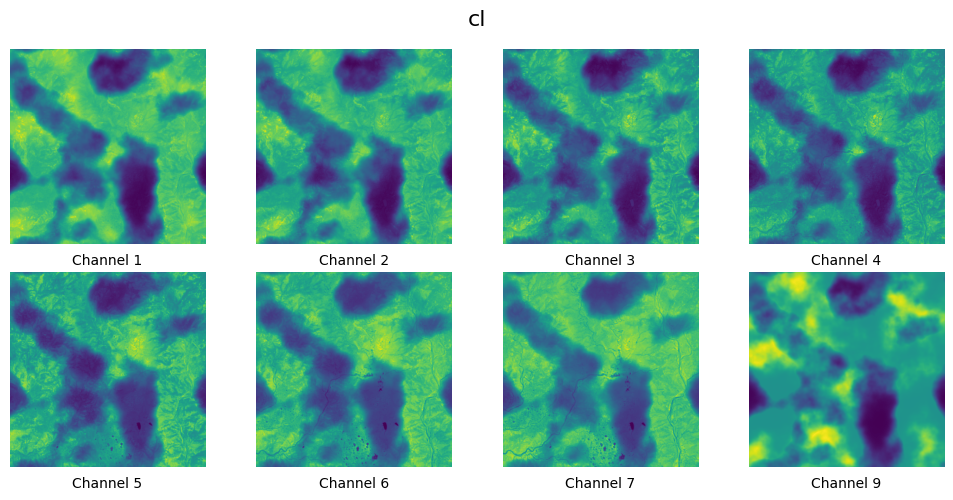

In [25]:
hyperplot(cl)